## 6. Files and OS

Issues:

 * Reading, writing files.  Searching for files. 
 * Dictionaries to keep track of data. 
 

In [1]:
## python lists

L = [1, 2, 3, 4, "blah", "blah"]
print(L)

[1, 2, 3, 4, 'blah', 'blah']


In [2]:
L[1]

2

In [3]:
L[1:3]

[2, 3]

In [4]:
L[-1]

'blah'

In [5]:
L[-2:]

['blah', 'blah']

In [6]:
## dictionaries are for keepings track of things using more natural
## ways of indexing

dict([("this morning temp", 3), ("yesterday afternoon", 10)])

{'this morning temp': 3, 'yesterday afternoon': 10}

In [7]:
## lets apply dictionaries to file IO

import os as os

In [8]:
print("filesystem root: ", os.listdir("/"))

filesystem root:  ['bin', 'boot', 'dev', 'etc', 'home', 'lib', 'lib64', 'media', 'mnt', 'opt', 'proc', 'root', 'run', 'sbin', 'srv', 'sys', 'tmp', 'usr', 'var', 'user', 'data', '.dockerenv', 'node_modules']


In [9]:
os.uname()

posix.uname_result(sysname='Linux', nodename='fdccb1f96257', release='3.10.0-957.1.3.el7.x86_64', version='#1 SMP Thu Nov 29 14:49:43 UTC 2018', machine='x86_64')

In [10]:
os.getcwd()

'/home/user/mp248-course-notes'

In [11]:
os.listdir('.')

['3. Introduction to Python programming.ipynb',
 '4. Python plotting, interpolation, units, 2D arrays.ipynb',
 '0. Introduction.ipynb',
 '2. Intro Git.ipynb',
 'images',
 '.ipynb_checkpoints',
 '6. Files and OS.ipynb',
 '.git',
 'README.md',
 '1. Command line interface - Linux, Unix, GNU.ipynb',
 '5. Numerical integration and differentiation.ipynb',
 'examples',
 'Labs',
 'Quizzes_Assignments_Exams']

In [12]:
## os.path

os.path.abspath('.')

'/home/user/mp248-course-notes'

In [13]:
os.listdir('/')

['bin',
 'boot',
 'dev',
 'etc',
 'home',
 'lib',
 'lib64',
 'media',
 'mnt',
 'opt',
 'proc',
 'root',
 'run',
 'sbin',
 'srv',
 'sys',
 'tmp',
 'usr',
 'var',
 'user',
 'data',
 '.dockerenv',
 'node_modules']

In [14]:
os.path.isfile("/run")

False

In [15]:
os.path.isdir("/run")

True

In [16]:
with os.scandir('.') as it:
    for entry in it:
        print(type(entry), entry, entry.is_dir())

<class 'posix.DirEntry'> <DirEntry '3. Introduction to Python programming.ipynb'> False
<class 'posix.DirEntry'> <DirEntry '4. Python plotting, interpolation, units, 2D arrays.ipynb'> False
<class 'posix.DirEntry'> <DirEntry '0. Introduction.ipynb'> False
<class 'posix.DirEntry'> <DirEntry '2. Intro Git.ipynb'> False
<class 'posix.DirEntry'> <DirEntry 'images'> True
<class 'posix.DirEntry'> <DirEntry '.ipynb_checkpoints'> True
<class 'posix.DirEntry'> <DirEntry '6. Files and OS.ipynb'> False
<class 'posix.DirEntry'> <DirEntry '.git'> True
<class 'posix.DirEntry'> <DirEntry 'README.md'> False
<class 'posix.DirEntry'> <DirEntry '1. Command line interface - Linux, Unix, GNU.ipynb'> False
<class 'posix.DirEntry'> <DirEntry '5. Numerical integration and differentiation.ipynb'> False
<class 'posix.DirEntry'> <DirEntry 'examples'> True
<class 'posix.DirEntry'> <DirEntry 'Labs'> True
<class 'posix.DirEntry'> <DirEntry 'Quizzes_Assignments_Exams'> True


In [17]:
for x in os.listdir():
    print(type(x), x)

<class 'str'> 3. Introduction to Python programming.ipynb
<class 'str'> 4. Python plotting, interpolation, units, 2D arrays.ipynb
<class 'str'> 0. Introduction.ipynb
<class 'str'> 2. Intro Git.ipynb
<class 'str'> images
<class 'str'> .ipynb_checkpoints
<class 'str'> 6. Files and OS.ipynb
<class 'str'> .git
<class 'str'> README.md
<class 'str'> 1. Command line interface - Linux, Unix, GNU.ipynb
<class 'str'> 5. Numerical integration and differentiation.ipynb
<class 'str'> examples
<class 'str'> Labs
<class 'str'> Quizzes_Assignments_Exams


In [18]:
## use os.walk

for dirName, subdirList, fileList in os.walk('.'):
    print("Dir: ", dirName)
    pad = (" "*dirName.count('/'))
    for fname in fileList:
        print(pad, fname)
    #print("Subdirs: ", subdirList)

Dir:  .
 3. Introduction to Python programming.ipynb
 4. Python plotting, interpolation, units, 2D arrays.ipynb
 0. Introduction.ipynb
 2. Intro Git.ipynb
 6. Files and OS.ipynb
 README.md
 1. Command line interface - Linux, Unix, GNU.ipynb
 5. Numerical integration and differentiation.ipynb
Dir:  ./images
  secondplot.png
  quarter.png
  ResistorCircuit.jpg
  firstplot.png
  fig_circle_pi.jpg
Dir:  ./.ipynb_checkpoints
  6. Files and OS-checkpoint.ipynb
Dir:  ./.git
  ORIG_HEAD
  COMMIT_EDITMSG
  HEAD
  packed-refs
  index
  description
  config
  FETCH_HEAD
Dir:  ./.git/refs
Dir:  ./.git/refs/tags
Dir:  ./.git/refs/remotes
Dir:  ./.git/refs/remotes/origin
     HEAD
     master
Dir:  ./.git/refs/heads
    master
Dir:  ./.git/hooks
   pre-receive.sample
   pre-applypatch.sample
   pre-rebase.sample
   fsmonitor-watchman.sample
   prepare-commit-msg.sample
   commit-msg.sample
   pre-commit.sample
   post-update.sample
   applypatch-msg.sample
   pre-push.sample
   update.sample
Dir:  .

In [19]:
print("blah"*3)

blahblahblah


In [20]:
## let's build some code keep track of all different file sizes
## in a directory tree

## write a procedure that will comb through a directory tree, 
## and count files by their size. The return value will be a 
## dictionary (file size in kb, number of files of that type)

scount = dict([])
scount[1] += 1

KeyError: 1

In [21]:
scount[1] = 0
scount[1] += 1

In [22]:
print(scount)

{1: 1}


In [23]:
## a cute variant of the dictionary called the defaultdict

import collections as co
scount = co.defaultdict(int)

In [24]:
print(scount)

defaultdict(<class 'int'>, {})


In [26]:
scount[50]+=2
print(scount)

defaultdict(<class 'int'>, {1: 1, 50: 2})


In [27]:
## run through directory tree, and count files by size. 
for dirName, subdirList, fileList in os.walk('/'):
    for fname in fileList:
        ## gives us the fully-qualified filename
        fn = os.path.join(dirName, fname)
        if dirName == '/proc':
            subdirList[:] = []
            continue
        if os.path.islink(fn)==False:
            scount[os.stat(fn).st_size // 1024] += 1

In [28]:
print(scount)

defaultdict(<class 'int'>, {1: 21495, 50: 134, 0: 55822, 1087: 1, 34: 310, 2: 12127, 4: 66612, 3: 8331, 13: 1185, 62: 77, 58: 105, 66: 56, 138: 15, 118: 25, 98: 26, 74: 57, 82: 36, 130: 24, 70: 49, 30: 358, 63: 95, 214: 4, 5: 4933, 99: 31, 18: 752, 26: 381, 51: 89, 78: 50, 42: 192, 38: 205, 14: 1165, 134: 19, 106: 33, 43: 131, 413: 2, 9: 2382, 86: 42, 166: 14, 10: 2245, 19: 617, 8: 2655, 240: 11, 33: 257, 12: 1376, 7: 3082, 23: 433, 16: 944, 6: 4191, 131: 25, 11: 1559, 28: 295, 540: 1, 202: 4, 87: 39, 36: 196, 325: 6, 15: 1031, 41: 149, 31: 337, 90: 40, 430: 2, 37: 190, 20: 556, 425: 2, 345: 3, 335: 1, 984: 1, 128: 17, 96: 24, 32: 264, 121: 21, 304: 1, 65: 63, 1982: 1, 186: 7, 35: 230, 316: 2, 407: 3, 94: 34, 1128: 1, 150: 12, 1660: 1, 332: 4, 137: 12, 185: 8, 46: 134, 22: 535, 54: 95, 453: 3, 141: 10, 274: 6, 151: 16, 684: 1, 191: 4, 25: 360, 524: 1, 114: 24, 306: 8, 198: 15, 287: 8, 55: 72, 213: 6, 122: 21, 1001: 1, 126: 24, 102: 42, 512: 5, 64: 113, 256: 7, 16384: 2, 8192: 1, 1024: 

In [29]:
scount.items()

dict_items([(1, 21495), (50, 134), (0, 55822), (1087, 1), (34, 310), (2, 12127), (4, 66612), (3, 8331), (13, 1185), (62, 77), (58, 105), (66, 56), (138, 15), (118, 25), (98, 26), (74, 57), (82, 36), (130, 24), (70, 49), (30, 358), (63, 95), (214, 4), (5, 4933), (99, 31), (18, 752), (26, 381), (51, 89), (78, 50), (42, 192), (38, 205), (14, 1165), (134, 19), (106, 33), (43, 131), (413, 2), (9, 2382), (86, 42), (166, 14), (10, 2245), (19, 617), (8, 2655), (240, 11), (33, 257), (12, 1376), (7, 3082), (23, 433), (16, 944), (6, 4191), (131, 25), (11, 1559), (28, 295), (540, 1), (202, 4), (87, 39), (36, 196), (325, 6), (15, 1031), (41, 149), (31, 337), (90, 40), (430, 2), (37, 190), (20, 556), (425, 2), (345, 3), (335, 1), (984, 1), (128, 17), (96, 24), (32, 264), (121, 21), (304, 1), (65, 63), (1982, 1), (186, 7), (35, 230), (316, 2), (407, 3), (94, 34), (1128, 1), (150, 12), (1660, 1), (332, 4), (137, 12), (185, 8), (46, 134), (22, 535), (54, 95), (453, 3), (141, 10), (274, 6), (151, 16), (

In [30]:
import operator as op
## how do you sort dict    print(pad, fileList)
#ionaries? 
## convert dict to a list with items() command
sortcount = sorted( scount.items(), key=op.itemgetter(1) )

In [31]:
print(sortcount[-10:])

[(9, 2382), (8, 2655), (7, 3082), (6, 4191), (5, 4933), (3, 8331), (2, 12127), (1, 21495), (0, 55822), (4, 66612)]


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

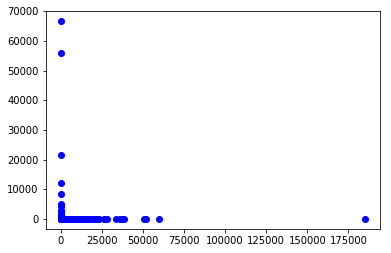

In [33]:
X = [a[0] for a in sortcount]
## list comprehension
Y = [a[1] for a in sortcount]
plt.plot(X,Y, 'bo')

## Experiment:

Use dictionaries to compares works of literature. 

Project Gutenberg webpage w/works of Shakespere. 

Build dictionaries that keep track of words used in texts. 

Can compare two books, for novel word usage. 

Count word usage, how often is a word used? 

In [34]:
import requests as req

In [35]:
hamstr = req.get('https://www.gutenberg.org/ebooks/2265.txt.utf-8').content

In [36]:
romstr = req.get('https://www.gutenberg.org/ebooks/1777.txt.utf-8').content

In [37]:
print(type(romstr))

<class 'bytes'>


In [38]:
print(romstr[0:10])

b'\xef\xbb\xbf\r\nThis '


In [51]:
## this is a unicode file
S = hamstr.decode("utf-8")
R = romstr.decode("utf-8")

In [40]:
print(type(S))

<class 'str'>


In [41]:
S[0:40]

"\ufeff***The Project Gutenberg's Etext of Sha"

In [52]:
import string
print(string.punctuation)
rPun = string.punctuation.replace("'", '')
print(rPun)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~


In [54]:
## sets are like lists but have two main differences:
## (1) they are unordered
## (2) an object can be contained only once 
def setOfWords(strname):
    ## empty set
    bset = set()
    ## will be a list of every object in strname
    ## once split along the spaces
    strname = strname.replace('\r\n', ' ')
    strname = strname.lower()
    for c in rPun:
        strname = strname.replace(c, ' ')
    ln = strname.split(' ')
    for w in ln:
        if w!='':
            bset.add(w)
    return(bset)

hamwords = setOfWords(S)
romwords = setOfWords(R)
print(len(hamwords), len(romwords))
## TODO: deal with the \r\n issue.  Deal with caps. 

5344 4148


In [49]:
print(hamwords)

{'your', 'moneth', 'poem', 'playd', 'gouerne', 'imediate', 'currently', 'mentioned', 'imminent', 'table', 're', 'catch', 'bap', 'guarded', 'leuell', 'reuerted', 'yeelding', 'asleepe', 'counter', 'express', 'greenly', 'constructed', "abus'd", 'flesh', 'benetted', 'wherein', 'bulwarke', 'bewept', 'coozenage', 'had', 'tender', 'plye', 'simple', 'declension', "for's", 'iustice', 'moult', 'young', 'battalians', 'clad', 'liquid', 'damned', 'ill', "finger'd", 'priuy', 'references', 'mother', 'say', 'swathing', 'browser', 'sea', 'per', "would'st", 'iudgement', 'woodcocks', "suck'd", 'mans', 'good', 'armie', 'water', 'folke', 'cease', 'doubt', 'neptunes', 'became', 'binary', 'entertainment', "ouerlook'd", 'swift', 'demand', 'cerments', 'auspicious', 'snatches', 'necessary', 'throw', 'titles', 'excrements', 'stated', 'ghost', 'kissing', 'seal', 'marching', 'haste', 'ranke', 'could', 'axe', 'total', 'listing', 'seeme', 'fardles', 'buttons', 'trespasse', 'above', 'betoken', 'dare', 'vndertakings',

In [57]:
## construct a set of words that are novel to one book
hamnov = hamwords.difference(romwords)
romnov = romwords.difference(hamwords)
print(len(hamnov), len(romnov))

3714 2518


In [59]:
## build a function to count word frequency
## use R and S as input
def countWords(strname):
    ## empty defaultdict
    ct = co.defaultdict(int)
    ## will be a list of every object in strname
    ## once split along the spaces
    strname = strname.replace('\r\n', ' ')
    strname = strname.lower()
    for c in rPun:
        strname = strname.replace(c, ' ')
    ln = strname.split(' ')
    for w in ln:
        if w!='':
            ct[w]+=1
    return(ct)

romct = countWords(R)
hamct = countWords(S)

In [62]:
romsort = sorted( romct.items(), key=op.itemgetter(1) )
hamsort = sorted( hamct.items(), key=op.itemgetter(1) ) 

In [63]:
print(romsort[0:10])

[('\ufeff', 1), ('presented', 1), ('cooperation', 1), ('cdroms', 1), ('releases', 1), ('placed', 1), ('has', 1), ('implications', 1), ('cooperate', 1), ('reading', 1)]


In [64]:
print(romsort[-10:])

[('in', 329), ('my', 359), ('that', 365), ('is', 384), ('of', 474), ('a', 478), ('i', 575), ('to', 612), ('the', 748), ('and', 780)]


In [67]:
## builds a list of pairs of (x,y) where x is a word novel to Romeo&Juliet
### y is romct[x]. 
romnovct = [(x, romct[x]) for x in romnov]
romnovsort = sorted( romnovct, key=op.itemgetter(1) )

In [68]:
print(romnovsort[-10:])

[('juliet', 59), ('mer', 62), ('ben', 64), ("i'll", 71), ('friar', 92), ('jul', 117), ('romeo', 136), ('love', 139), ('nurse', 150), ('rom', 163)]


In [ ]:
## make a stand-alone python program
## one you can execute from the command prompt
## write code executable from the command prompt will output
## the 10 most common words from a book given by a http address.(webpage)

## python3 wordct.py [address]
## format we would call it with

import sys

import string
print(string.punctuation)
rPun = string.punctuation.replace("'", '')
print(rPun)

def countWords(strname):
    ## empty defaultdict
    ct = co.defaultdict(int)
    ## will be a list of every object in strname
    ## once split along the spaces
    strname = strname.replace('\r\n', ' ')
    strname = strname.lower()
    for c in rPun:
        strname = strname.replace(c, ' ')
    ln = strname.split(' ')
    for w in ln:
        if w!='':
            ct[w]+=1
    return(ct)

def countWPW(wpstring):
    romstr = req.get(wpstring).content.decode("utf-8")
    return(countWords(romstr))

## argv variable list of all the strings on the command line
print(sys.argv)